In [1]:
import pandas as pd

In [2]:
df = pd.read_json('data/ucsb_speeches_2016.json')

In [3]:
df = df.reset_index().drop(columns=['index'])

In [4]:
df.loc[31]['transcript']

'\nThis is amazing. What a great place. Thank you very much. We have thousands of people outside trying to get in. But we should start. Do we agree? [applause]\nWe should start. So they\'ll come in. They\'ll come in.\nFirst of all I want to thank you. Special, special place. It\'s a special place with incredible people. In one day, do you believe this? One day we are going to win the great state of North Carolina... [applause]\nAnd we are going to win back the White House. [applause]\nThis election will decide whether we are ruled by a corrupt political class. You\'re seeing what\'s happening. Everybody\'s watching. Or whether we are ruled by the people. We\'re going to be ruled by the people, folks. [applause]\nThat is going to be the choice. A failed political establishment has delivered nothing but poverty, nothing but problems, nothing but losses. Nothing but losses. We don\'t win anymore as a country. We\'re going to start winning again. [applause]\nThey get rich by making America

In [5]:
df

,link,title,date,person,transcript
0,/documents/remarks-town-hall-meeting-portsmout...,"Remarks at a Town Hall Meeting in Portsmouth, ...",2015-12-29 00:00:00+00:00,Hillary Clinton,\nCLINTON: Wow. Thank you. Thank you all. Than...
1,/documents/remarks-the-university-minnesota-mi...,Remarks at the University of Minnesota in Minn...,2015-12-15 00:00:00+00:00,Hillary Clinton,\nThank you. Thank you all very much. Thank yo...
2,/documents/interview-with-george-stephanopoulo...,Interview with George Stephanopoulos of ABC Ne...,2015-12-06 00:00:00+00:00,Hillary Clinton,\nSTEPHANOPOULOS: And we'll hear more on that ...
3,/documents/interview-with-charlie-rose,Interview with Charlie Rose,2015-12-01 00:00:00+00:00,Hillary Clinton,"\nROSE: She is a former first lady, a former s..."
4,/documents/remarks-and-question-and-answer-ses...,Remarks and a Question and Answer Session at t...,2015-11-19 00:00:00+00:00,Hillary Clinton,\nCLINTON: Thank you. Thank you very much. [ap...
...,...,...,...,...,...
158,/documents/interview-with-chuck-todd-nbc-news-...,"Interview with Chuck Todd of NBC News ""Meet th...",2016-01-17 00:00:00+00:00,Hillary Clinton,\nTODD: But we start with the Democrats and a ...
159,/documents/interview-with-jake-tapper-cnns-sta...,"Interview with Jake tapper of CNN's ""State of ...",2016-01-17 00:00:00+00:00,Hillary Clinton,\nTAPPER: We're joined right off the bat by De...
160,/documents/interview-with-alisyn-camerota-cnn,Interview with Alisyn Camerota of CNN,2016-01-13 00:00:00+00:00,Hillary Clinton,"\nCAMEROTA: Secretary Clinton, thanks so much ..."
161,/documents/interview-with-john-dickerson-cbs-n...,"Interview with John Dickerson of CBS News ""Fac...",2016-01-10 00:00:00+00:00,Hillary Clinton,\nDICKERSON: We're going to get right to our l...


In [4]:
dates = df.groupby(['person','date']).agg({'transcript': 'count'}).reset_index()

In [5]:
from matplotlib import pyplot as plt

In [6]:
dt_dates = dates[dates['person']=='Donald J. Trump'].drop(columns='person').set_index('date')
hc_dates = dates[dates['person']=='Hillary Clinton'].drop(columns='person').set_index('date')

In [7]:
idx = pd.date_range(min(dates.date), max(dates.date))
#dt_dates.set_index('date')
dt_dates = dt_dates.reindex(idx, fill_value=0)
hc_dates = hc_dates.reindex(idx, fill_value=0)

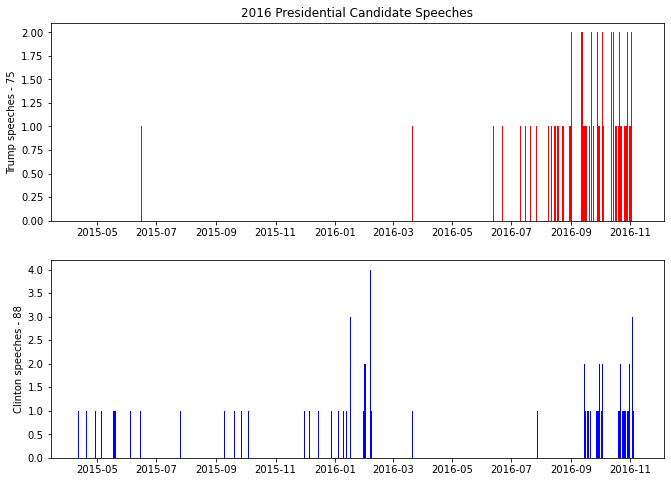

In [11]:
from matplotlib import dates as d
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import numpy as np
#x = np.arange(0,len(idx),1)
fig, ax = plt.subplots(2,1)
fig.set_size_inches(11,8)
ax[0].bar(d.date2num(idx), dt_dates['transcript'], color="red")
ax[1].bar(d.date2num(idx), hc_dates['transcript'], color="blue")
#xt = np.arange(min(d.date2num(idx)),max(d.date2num(idx)),step=14)
#xl = [d.num2date(x).strftime('%m-%d') for x in xt]
#ax[0].set_xticks(xt)
#ax[1].set_xticks(xt)
#ax[0].set_xticklabels(xl, rotation=20)
#ax[1].set_xticklabels(xl, rotation=20)

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)
ax[0].xaxis.set_major_locator(xtick_locator)
ax[0].xaxis.set_major_formatter(xtick_formatter)
ax[1].xaxis.set_major_locator(xtick_locator)
ax[1].xaxis.set_major_formatter(xtick_formatter)

ax[0].set_ylabel('Trump speeches - 75')
ax[1].set_ylabel('Clinton speeches - 88')
ax[0].set_title('2016 Presidential Candidate Speeches')
plt.show()